# Continuous non-Contractual

In [1]:
from pymc_marketing.clv.distributions import ContNonContract

import numpy as np
import pandas as pd

import pymc as pm

import matplotlib.pyplot as plt
import arviz as az

## Ground Truth Parameter Values

In [2]:
rng = np.random.RandomState(seed=34)
T = 10
T0 = 0

# individual-level model
lam = 0.5; p = 0.3

## Sampling from the Prior

We will perform inference on the prior data to estimate the values of `lam` and `p` which have been set to 0.5 and 0.3 respectively.

In [3]:
cnc = ContNonContract.dist(
    lam=lam,
    p=p,
    T=T,
    T0=T0,
)

prior_data = pm.draw(cnc, draws=10000)

## Posterior Inference

In [4]:
with pm.Model() as model:

    λ = pm.Gamma(name="λ", alpha=0.1, beta=0.1)
    π = pm.Beta(name="π", alpha=0.1, beta=0.1)
    
    cnc = ContNonContract(
        name="cnc",
        lam=λ,
        p=π,
        T=T,
        T0=T0,
        observed=prior_data
    )
    
    trace = pm.sample(draws=1000, chains=1, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [λ, π]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 7 seconds.
/home/ricardo/miniconda3/envs/pymmmc/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


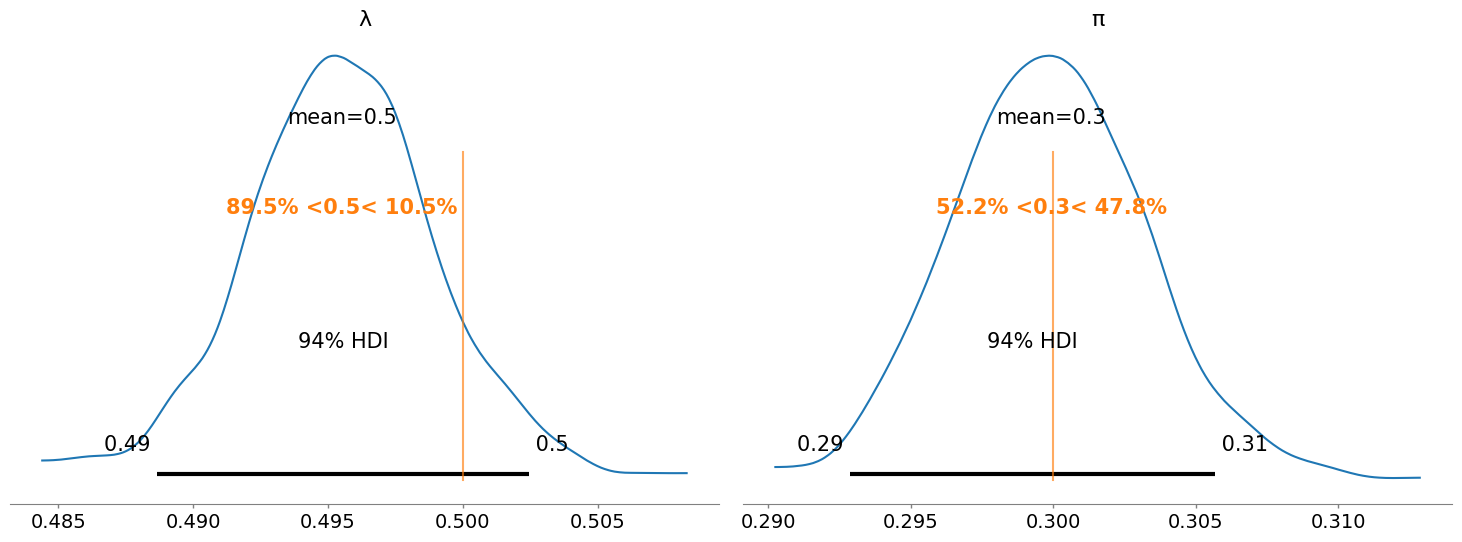

In [5]:
_ = az.plot_posterior(trace, ref_val=[lam, p])
plt.tight_layout()